<a href="https://colab.research.google.com/github/Rajarathour17/AI-Driven-Archeaological-Site-Mapping/blob/main/Training_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Sep 29 04:33:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import ultralytics
ultralytics.checks()


Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.3/112.6 GB disk)


In [5]:
ROOT_DIR = '/content/drive/My Drive/vegetation_segmentation'

In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={"/content/drive/MyDrive/vegetation_segmentation/data.yaml"} epochs=50 imgsz=640

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/vegetation_segmentation/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

In [7]:
!ls '/content/runs/detect/train'

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2360.jpg  val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch2361.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch2362.jpg  weights
labels.jpg			 train_batch2.jpg


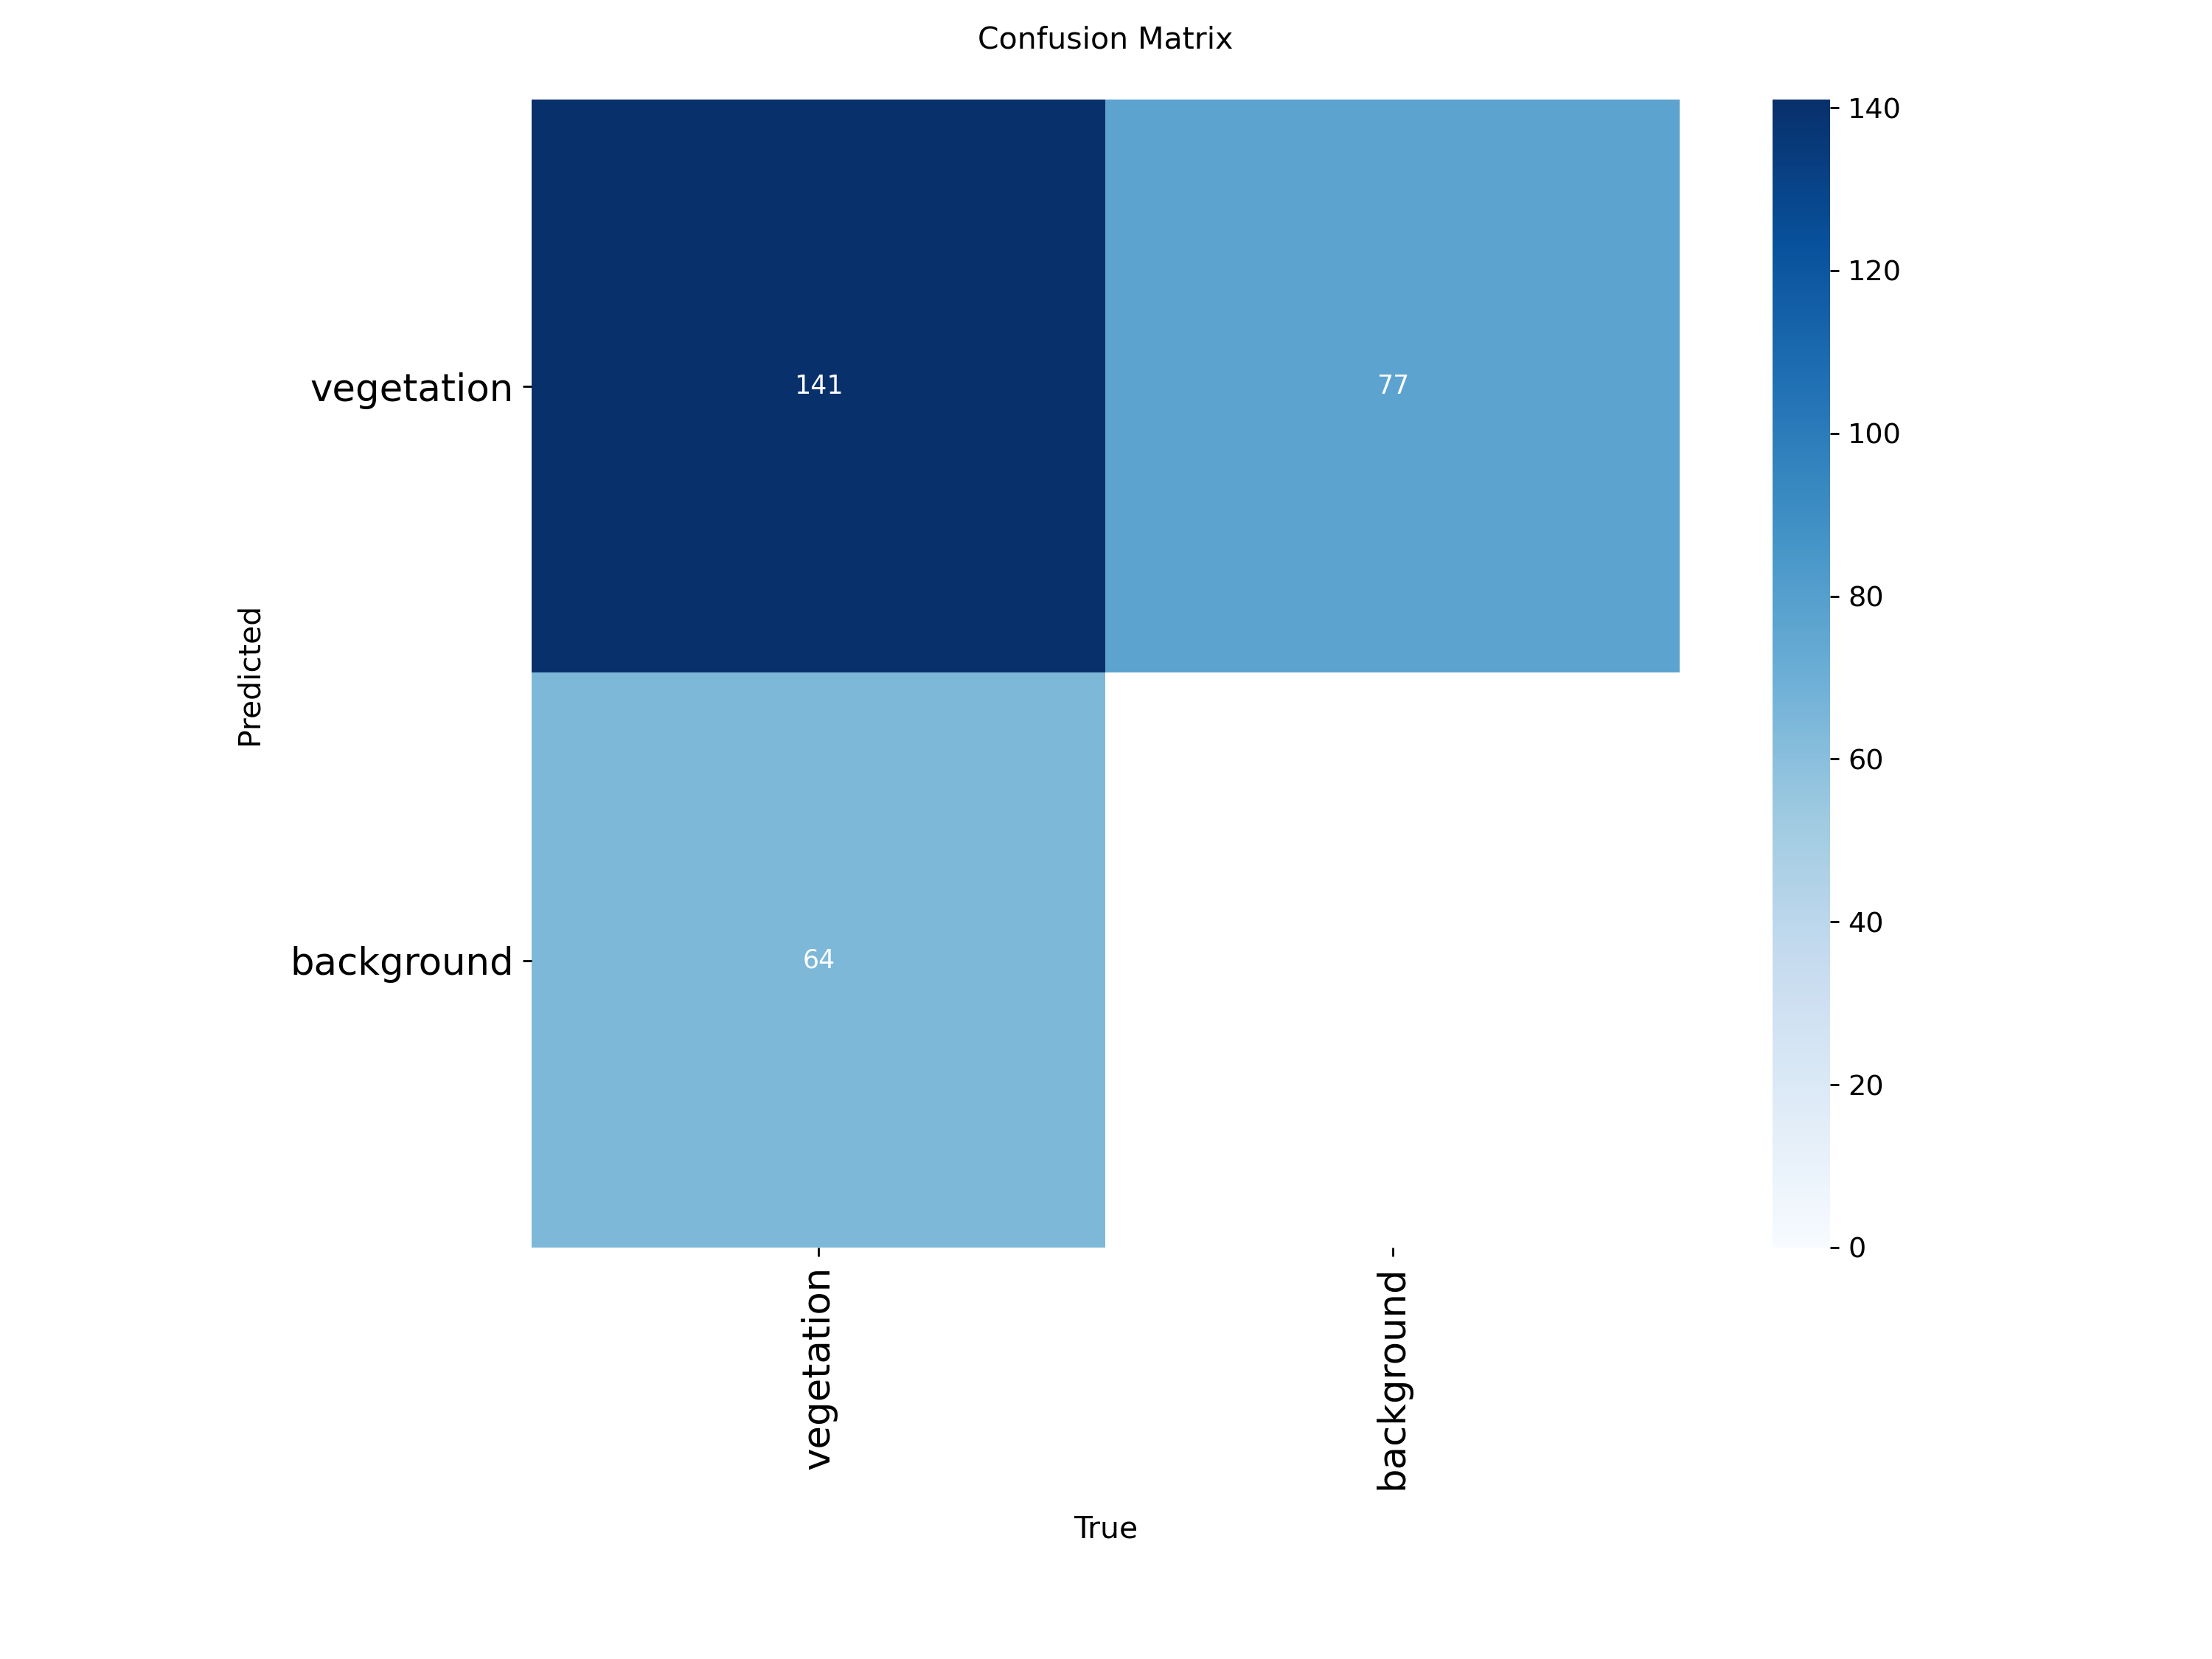

In [9]:
resultData = '/content/runs/detect/train'
from IPython.display import Image, display

Image(filename=f'{resultData}/confusion_matrix.png')

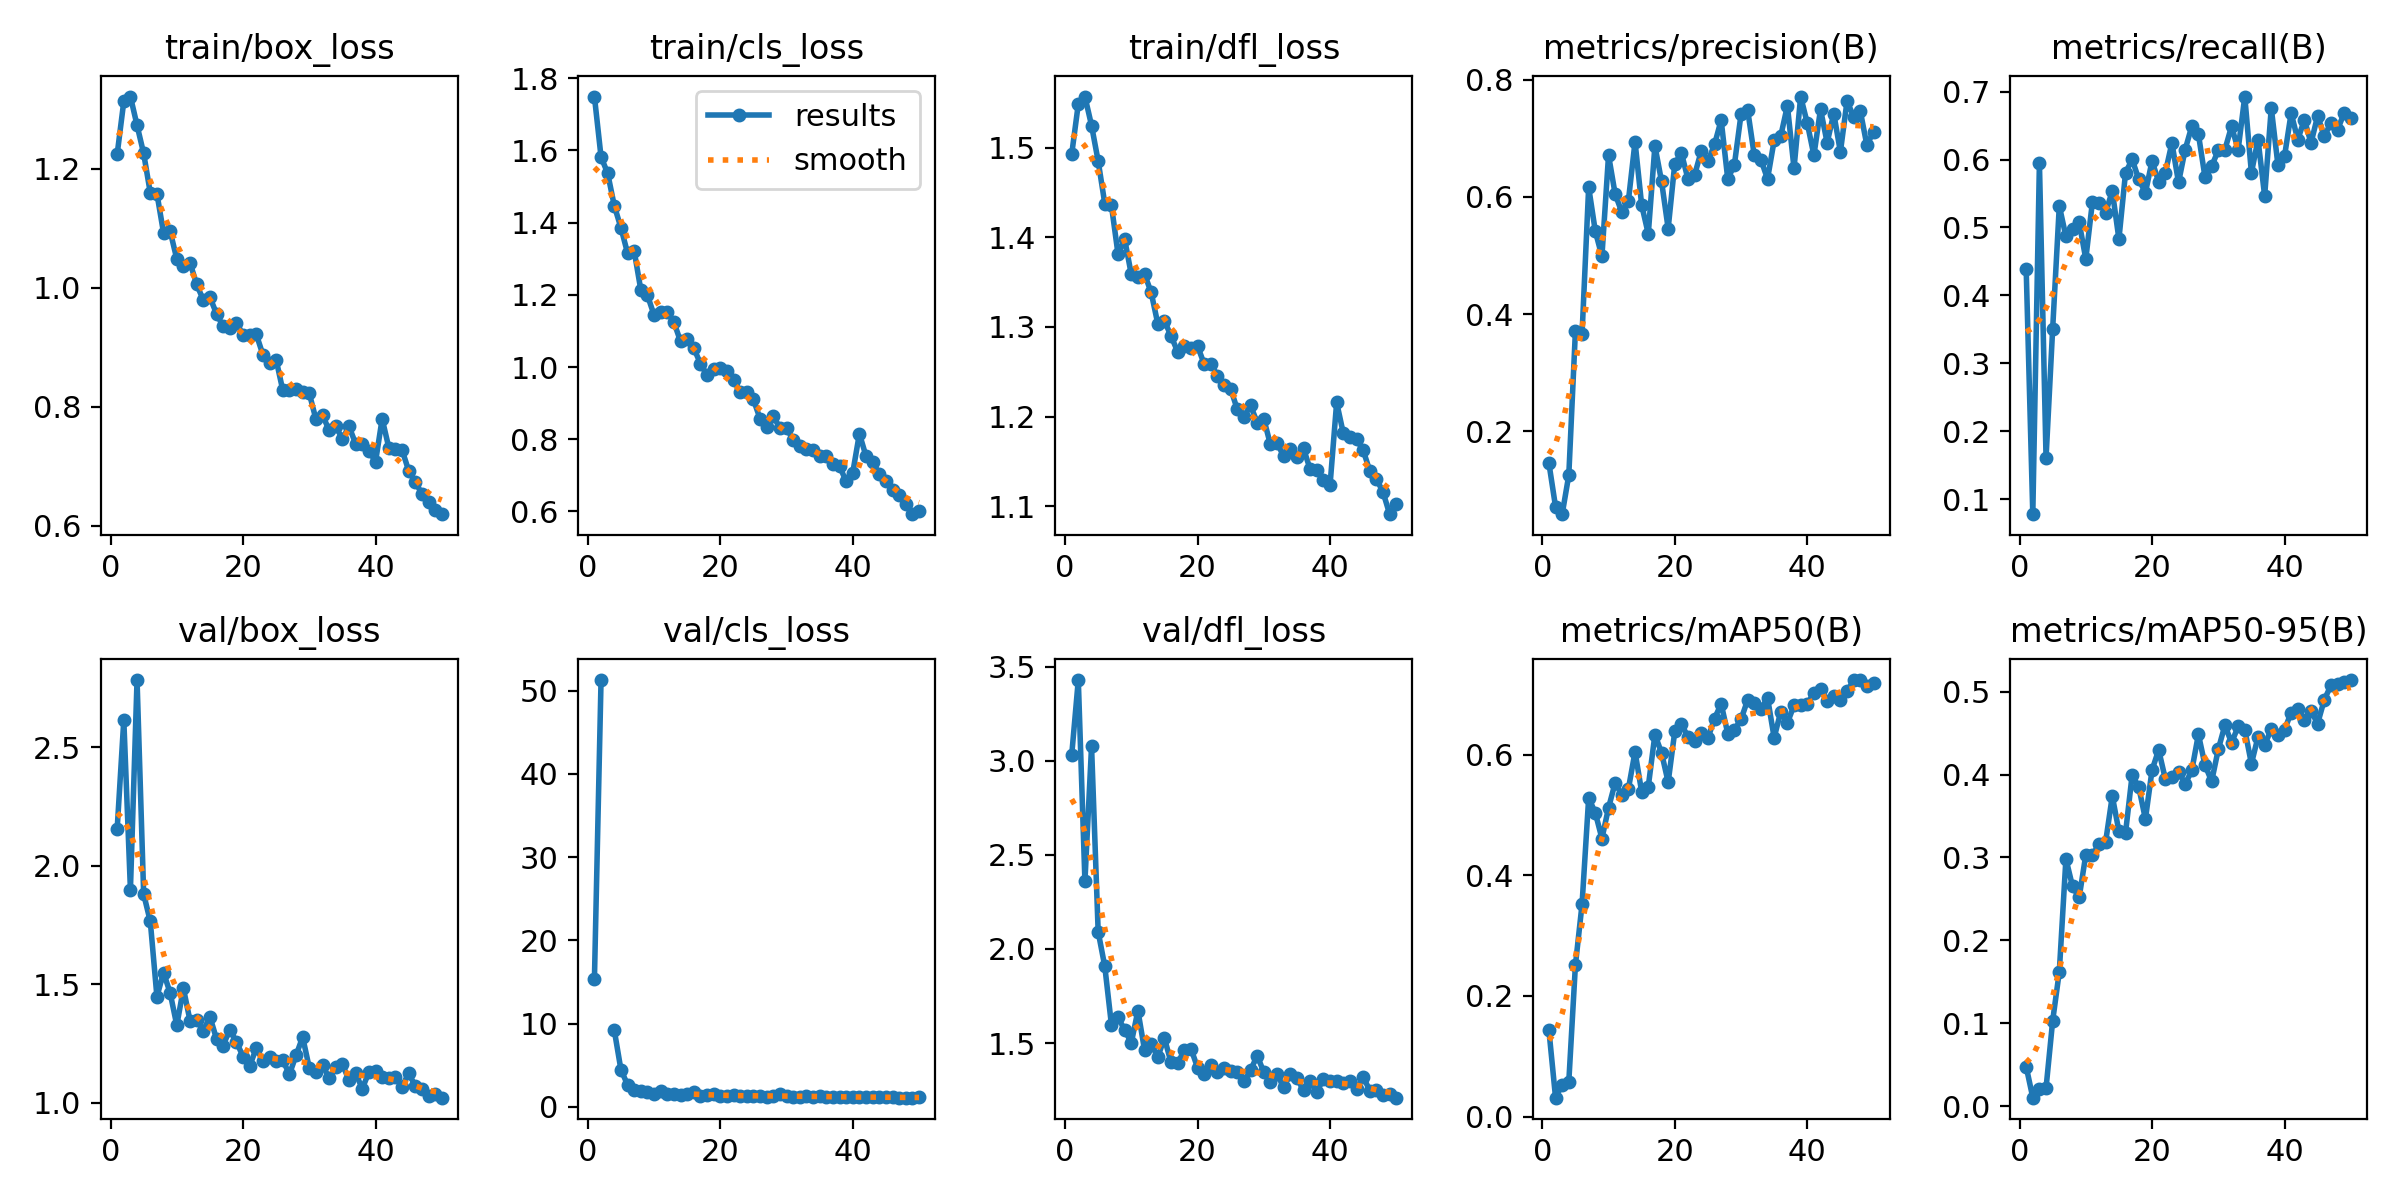

In [10]:
from IPython.display import Image, display

Image(filename=f'{resultData}/results.png')

In [11]:
import pandas as pd
df =pd.read_csv(f'{resultData}/results.csv') #df = dataframe
print (df.tail(1))

    epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
49     50  1863.93         0.61963         0.60152         1.10262   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
49               0.71154            0.66181           0.71936   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss   lr/pg0  \
49                0.514       1.02055       1.14568       1.21005  0.00006   

     lr/pg1   lr/pg2  
49  0.00006  0.00006  


In [12]:
%pwd

'/content'

In [13]:
!mkdir ManualTestingData

In [14]:
import os
os.chdir("/content/ManualTestingData")

In [ ]:
!yolo task=detect mode=predict model={"/content/runs/detect/train2/weights/best.pt"} source={ROOT_DIR}/test/images